<a href="https://colab.research.google.com/github/Saeed0Baba/TrashNet/blob/main/TrashNET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 5.4MB/s 
     |████████████████████████████████| 194kB 8.4MB/s 
     |████████████████████████████████| 51kB 4.8MB/s 
     |████████████████████████████████| 1.2MB 11.2MB/s 
     |████████████████████████████████| 12.8MB 216kB/s 
     |████████████████████████████████| 61kB 5.8MB/s 
     |████████████████████████████████| 776.8MB 24kB/s 
     |████████████████████████████████| 51kB 5.7MB/s 
ERROR: torchtext 0.9.1 has requirement torch==1.8.1, but you'll have torch 1.7.1 which is incompatible.
Mounted at /content/gdrive


In [3]:
from fastbook import *
from fastai.vision.all import *

In [4]:
import os

In [5]:
os.getcwd()

'/content'

In [6]:
#path = untar_data('content/gdrive/MyDrive/dataset-resized.zip')
# file_extract('/content/gdrive/MyDrive/dataset-resized.zip')
#path =  '/content/gdrive/MyDrive/dataset-resized'
path = Path(os.getcwd())/"gdrive"/"MyDrive"/"dataset-resized"

In [7]:
path.ls()

(#7) [Path('/content/gdrive/MyDrive/dataset-resized/.DS_Store'),Path('/content/gdrive/MyDrive/dataset-resized/cardboard'),Path('/content/gdrive/MyDrive/dataset-resized/glass'),Path('/content/gdrive/MyDrive/dataset-resized/metal'),Path('/content/gdrive/MyDrive/dataset-resized/paper'),Path('/content/gdrive/MyDrive/dataset-resized/plastic'),Path('/content/gdrive/MyDrive/dataset-resized/trash')]

In [8]:
fname = (path).ls()[1]
fname.ls()[1]
# fname.name

Path('/content/gdrive/MyDrive/dataset-resized/cardboard/cardboard10.jpg')

In [9]:
re.findall(r'(.+)_\d+.jpg$', fname.name)

[]

In [10]:
# trash = DataBlock(blocks = (ImageBlock, CategoryBlock),
#                  get_items=get_image_files, 
#                  splitter=GrandparentSplitter(),
#                  get_y=parent_label)
#                  item_tfms=Resize(460),
#                  batch_tfms=aug_transforms(size=224, min_scale=0.75))
trashBLK = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 get_y=parent_label,
                 splitter=RandomSplitter(valid_pct=0.2, seed=42),
                 item_tfms=Resize(460),
                 batch_tfms=aug_transforms(size=224, min_scale=0.75))

In [11]:
trashBLK.summary(path)

Setting-up type transforms pipelines
Found 2527 items
2 datasets of sizes 2022,505
Setting up Pipeline: PILBase.create
Setting up Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      /content/gdrive/MyDrive/dataset-resized/metal/metal402.jpg
    applying PILBase.create gives
      PILImage mode=RGB size=512x384
  Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      /content/gdrive/MyDrive/dataset-resized/metal/metal402.jpg
    applying parent_label gives
      metal
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(2)

Final sample: (PILImage mode=RGB size=512x384, TensorCategory(2))


Found 2527 items
2 datasets of sizes 2022,505
Setting up Pipeline: PILBase.create
Setting up Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
Setting up a

In [12]:
path.ls()

(#7) [Path('/content/gdrive/MyDrive/dataset-resized/.DS_Store'),Path('/content/gdrive/MyDrive/dataset-resized/cardboard'),Path('/content/gdrive/MyDrive/dataset-resized/glass'),Path('/content/gdrive/MyDrive/dataset-resized/metal'),Path('/content/gdrive/MyDrive/dataset-resized/paper'),Path('/content/gdrive/MyDrive/dataset-resized/plastic'),Path('/content/gdrive/MyDrive/dataset-resized/trash')]

In [13]:
dls = trashBLK.dataloaders(path)

In [14]:
x,y = dls.one_batch()

In [15]:
len(y)

64

In [16]:
dls.vocab

['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

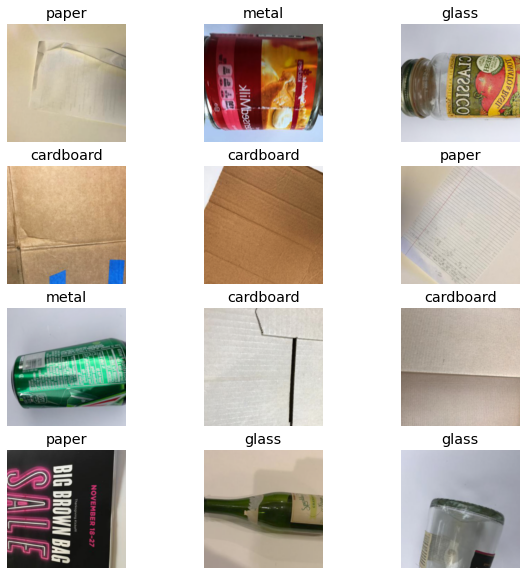

In [17]:
dls.train.show_batch(max_n=12, figsize=(10,10),nrows=4)

In [1]:
#Way 1
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(10)

NameError: ignored

In [ ]:
#WAY 2

In [18]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


In [ ]:
lr_min,lr_steep = learn.lr_find()

In [ ]:
print(f"Minimum/10: {lr_min:.2e}, steepest point: {lr_steep:.2e}")

In [ ]:
learn.fit_one_cycle(3, 3e-3)

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(12, lr_max=slice(1e-6,1e-4))

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [ ]:
interp.most_confused(min_val=5)

In [ ]:
interp.plot_top_losses(5,nrows=1)

In [ ]:
cleaner = ImageClassifierCleaner(learn)
cleaner